In [5]:
from advectionGP.sensors import FixedSensorModel, RemoteSensingModel
sensors = RemoteSensingModel()
particles = sensors.genParticles(Nparticles=5)  # Try 5 particles per grid
print("Particles shape:", particles.shape)  # Should be (5, num_grids, 3)


Particles shape: (5, 50, 3)


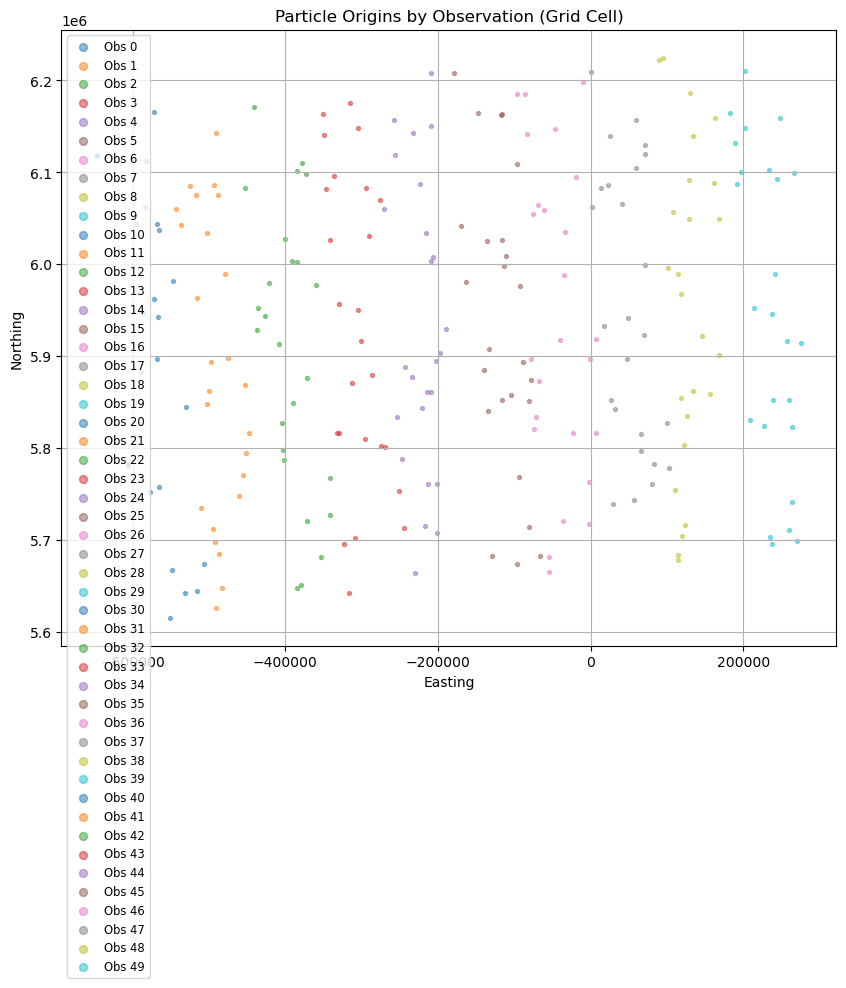

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
num_particles, num_observations, _ = particles.shape

for obs in range(num_observations):
    x = particles[:, obs, 1]  # easting
    y = particles[:, obs, 2]  # northing
    plt.scatter(x, y, label=f"Obs {obs}", s=8, alpha=0.5)

plt.xlabel("Easting")
plt.ylabel("Northing")
plt.title("Particle Origins by Observation (Grid Cell)")
plt.legend(markerscale=2, fontsize='small')
plt.grid(True)
plt.show()


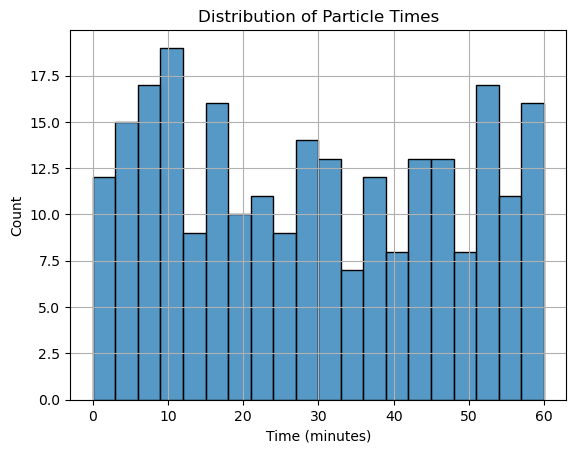

In [7]:
import seaborn as sns

plt.figure()
sns.histplot(particles[:, :, 0].flatten(), bins=20)
plt.title("Distribution of Particle Times")
plt.xlabel("Time (minutes)")
plt.ylabel("Count")
plt.grid(True)
plt.show()


In [8]:
from pyproj import Proj, Transformer
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Set up UTM to lat/lon transformer
proj = Proj(proj='utm', zone=56, south=True, ellps='WGS84')
transformer = Transformer.from_proj(proj, "epsg:4326", always_xy=True)


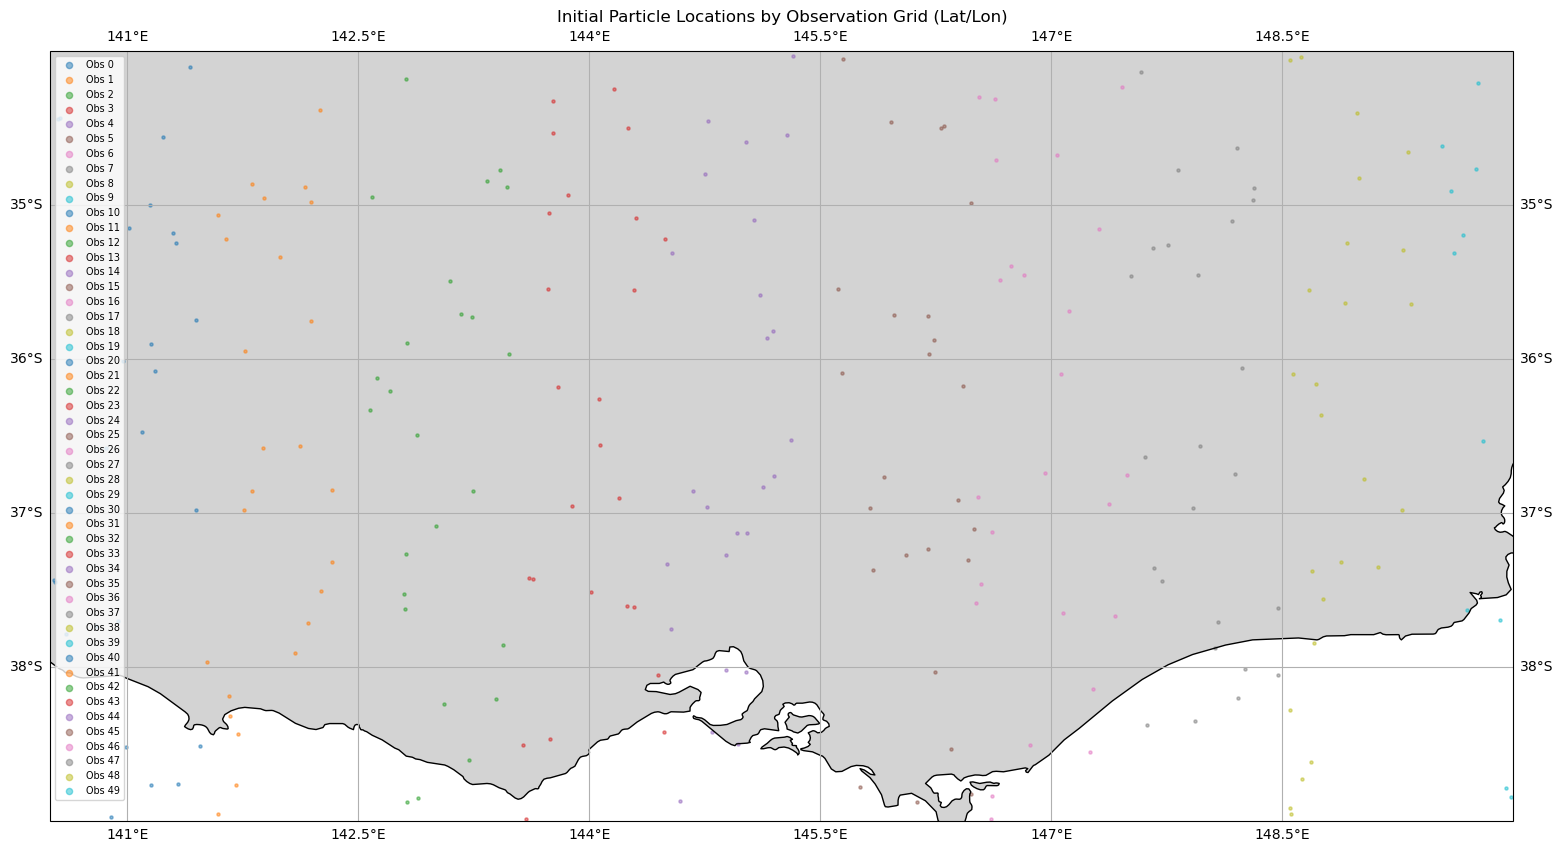

In [10]:
plt.figure(figsize=(20, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([140.5, 150, -39, -34], crs=ccrs.PlateCarree())  # Victoria bounds

# Add features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
ax.gridlines(draw_labels=True)

# Loop over observations and plot particles per grid cell
for obs in range(num_observations):
    east = particles[:, obs, 1]
    north = particles[:, obs, 2]
    lon, lat = transformer.transform(east, north)  # Convert to lat/lon

    ax.scatter(lon, lat, s=5, alpha=0.5, label=f"Obs {obs}")

# Optional: reduce clutter
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), fontsize="x-small", markerscale=2)

plt.title("Initial Particle Locations by Observation Grid (Lat/Lon)")
plt.show()


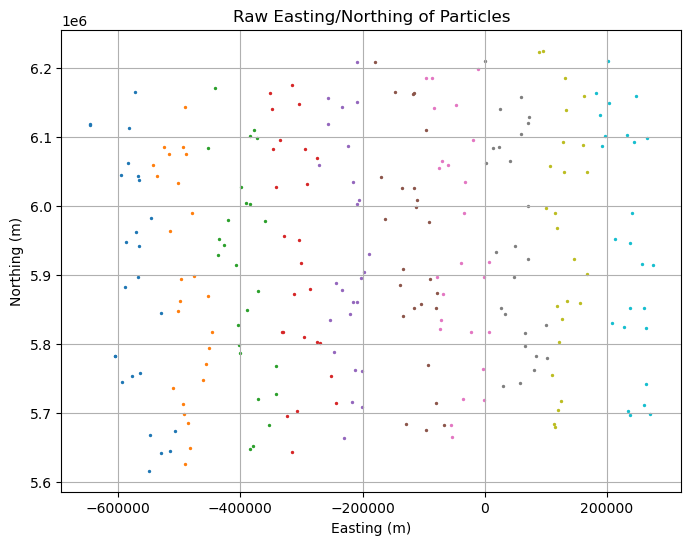

In [11]:
plt.figure(figsize=(8, 6))
for obs in range(num_observations):
    x = particles[:, obs, 1]
    y = particles[:, obs, 2]
    plt.scatter(x, y, s=2)
plt.title("Raw Easting/Northing of Particles")
plt.xlabel("Easting (m)")
plt.ylabel("Northing (m)")
plt.grid(True)
plt.show()
